# Thnik Stats
## 1st Chapter

In [90]:
import pandas as pd
from enum import Enum, auto
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import os
from urllib.request import urlretrieve
from os.path import basename, join, exists



def download(url, directory='.'):
    """
    Downloads a file from the specified URL and saves it to the given directory.
    
    :param url: The URL of the file to download.
    :param directory: The directory to save the downloaded file. Defaults to the current directory.
    """
    # Ensure the directory exists
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Create the full path for the file
    filename = basename(url)
    file_path = join(directory, filename)
    
    # Download the file if it doesn't already exist
    if not exists(file_path):
        local, _ = urlretrieve(url, file_path)
        print(f"Downloaded {local}")
    else:
        print(f"File already exists at {file_path}")

In [15]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct", "data")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz", "data"
)

Downloaded data/2002FemPreg.dct
Downloaded data/2002FemPreg.dat.gz


In [4]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkplot.py


## Examples from Chapter 1

In [2]:
import nsfg

In [3]:
preg = nsfg.ReadFemPreg(dct_file='data/2002FemPreg.dct',
                        dat_file='data/2002FemPreg.dat.gz')
preg.head()

/workspaces/Tech-Journey/learn/stats/think_stats/nsfg.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
/workspaces/Tech-Journey/learn/stats/think_stats/nsfg.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [4]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [5]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

In [6]:
preg.shape

(13593, 244)

In [66]:
class GroupType(Enum):
    """Type of group first kid or other"""
    FIRST = auto()
    OTHER = auto()

In [7]:
def partition_records(df):
    aux = df.copy()
    first_babies = aux[aux["birthord"] == 1]
    others_babies = aux[aux["birthord"] != 1]
    return first_babies, others_babies

In [74]:
class ProcessedDataFrame:
    def __init__(self, df: pd.DataFrame, group: GroupType) -> None:
        self.df = df
        self.n = len(df)
        self.mu = df["prglngth"].mean()
        self.group = group.name

    def sumarize(self):
        """Prints summary statistics of the DataFrame."""
        print(f"Stats for Group: {self.group}")
        print(f'Number of records: {self.n:,}')
        print(f'Mean of prglngth: {self.mu:.2f}')
        print("---"*20)

In [78]:
def summarizes(df):
    """Prints summary statistics for first babies and others
    
    Args:
        df: dataset
    """
    first_babies, others_babies = partition_records(df)
    first_group = ProcessedDataFrame(first_babies, GroupType.FIRST)
    others_group = ProcessedDataFrame(others_babies, GroupType.OTHER)
    first_group.sumarize()
    others_group.sumarize()
    return first_group, others_group

In [79]:
first_group, others_group = summarizes(preg)

Stats for Group: FIRST
Number of records: 4,413
Mean of prglngth: 38.60
------------------------------------------------------------
Stats for Group: OTHER
Number of records: 9,180
Mean of prglngth: 25.17
------------------------------------------------------------


In [82]:
first_group.mu - others_group.mu

np.float64(13.429709903449254)

In [91]:
def plot_histogram_comparison(df1: pd.DataFrame, df2: pd.DataFrame, column: str) -> None:
    """
    Plots a histogram comparing the specified column between two DataFrames.

    Args:
        df1: First DataFrame.
        df2: Second DataFrame.
        column: The column name to plot.
    """
    plt.figure(figsize=(12, 6))

    # Plot histograms
    sns.histplot(df1[column], color='blue', label='First Babies', kde=True, bins=30, alpha=0.6)
    sns.histplot(df2[column], color='orange', label='Others', kde=True, bins=30, alpha=0.6)

    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Comparison of {column} Distribution')
    plt.legend()
    
    # Show the plot
    plt.show()

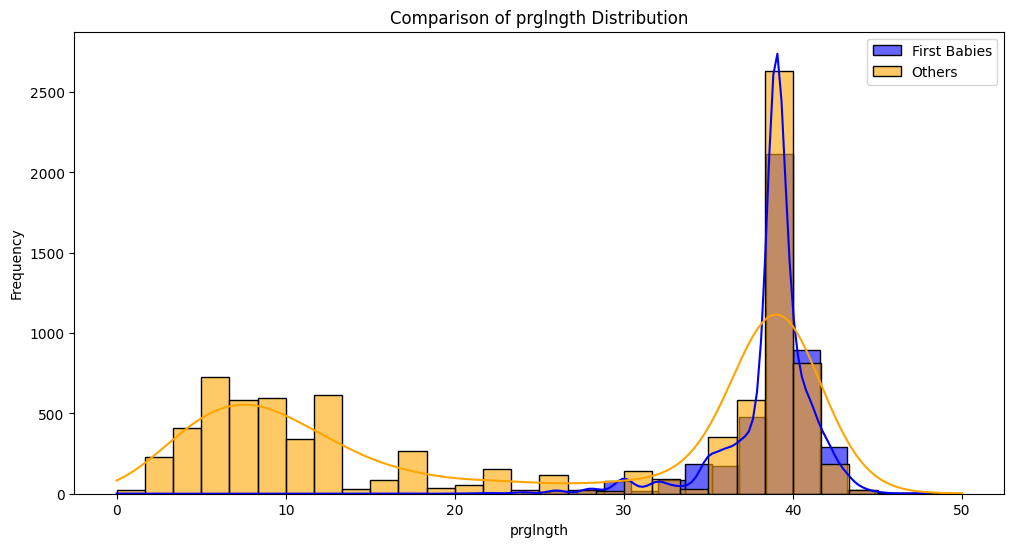

In [94]:
plot_histogram_comparison(first_group.df, others_group.df, 'prglngth')